In [157]:
import matplotlib.pyplot as plt
import gzip
from numpy import * 
import numpy as np
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model
import scipy
import random
from scipy import io
import os


In [2]:
%matplotlib inline  

In [18]:
year_raw = linspace(1845, 1903, 30)
year_raw = year_raw - 1845
year = year_raw
hare_raw= array([20, 20, 52, 83, 64, 68, 83, 12, 36, 150, 110, 60, 7, 10, 70, 100, 92, 70, 10, 11, 137, 137, 18, 22, 52, 83, 18, 10, 9, 65])
lynx_raw = array([32, 50, 12, 10, 13, 36, 15, 12, 6, 6, 65, 70, 40, 9, 20, 34, 45, 40, 15, 15, 60, 80, 26, 18, 37, 50, 35, 12, 12, 25])
delta_t_raw = year_raw[1] - year_raw[0]

Text(0.5, 1.0, 'Hare vs Lynx populations of our given data set')

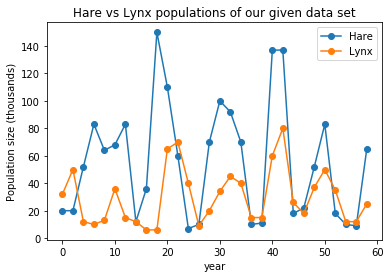

In [5]:
plt.plot(year, hare_raw, '-o', label = "Hare")
plt.plot(year, lynx_raw, '-o', label = "Lynx")
plt.xlabel("year")
plt.ylabel("Population size (thousands)")
plt.legend()
plt.title("Hare vs Lynx populations of our given data set")

In [19]:
print(hare_raw.shape)
print(len(hare_raw))
hare_spline = scipy.interpolate.CubicSpline(year_raw, hare_raw)
lynx_spline = scipy.interpolate.CubicSpline(year_raw, lynx_raw)
year = arange(0,58+0.5, 1)
delta_t = year[1] - year[0]
# plt.plot(year, hare, 'o')
# print(year[-1])
# year_double = range(int(year[-1])+1)
# plt.plot(year_double, hare2(year_double))
hare = hare_spline(year)
lynx = lynx_spline(year)

print(hare.shape)

(30,)
30
(59,)


In [7]:
print(year)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58.]


In [20]:
def DMD(X,Xprime,r): #Copied from notes
    U,Sigma,VT = svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = eig(Atilde) # Step 3
    Lambda = diag(Lambda)
    
    Phi = Xprime @ solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [104]:
X = array([hare, lynx])
print(X.shape)
Phi, Lambda, b = DMD(X[:, :-30],X[:, 1:-29],2)

(2, 59)


In [22]:
print(Phi)
print(Lambda)
print(b)

[[-0.64510685-0.13855239j -0.64510685+0.13855239j]
 [-0.55980508+0.17104943j -0.55980508-0.17104943j]]
[[0.87849576+0.07902182j 0.        +0.j        ]
 [0.        +0.j         0.87849576-0.07902182j]]
[-20.90035121-25.13821497j -20.90035121+25.13821497j]


In [23]:

t = 30
print(matmul(Phi, matmul(exp(Lambda * t), b)))

[-1.14381690e+13+0.j -1.04894478e+13+0.j]


(50, 2)


C:\Users\16kat\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Pricted Hare vs Lynx populations using DMD')

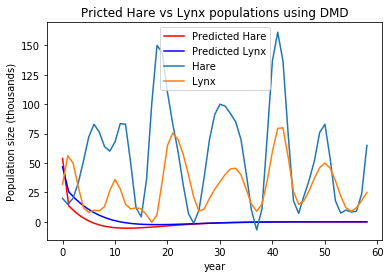

In [25]:
# x_sum = [0,0]
# Omega = np.array([[np.log(Lambda)[0,0] / delta_t, 0],[0, np.log(Lambda[0,0]) / delta_t]])
x = []
for t in linspace(0,58):
    x_t = (Phi @ ((Lambda ** t) @ b))#matmul(Phi, matmul(exp(Lambda * t), b))
    x.append(x_t)
x = array(x)
x_DMD = x
print(x_DMD.shape)
plt.plot(linspace(0,58), x[:,0], 'r', label = "Predicted Hare")
plt.plot(linspace(0,58), x[:,1], 'b', label = "Predicted Lynx")
plt.plot(year, hare, label = "Hare")
plt.plot(year, lynx, label = "Lynx")
plt.xlabel("year")
plt.ylabel("Population size (thousands)")
plt.legend()
plt.title("Pricted Hare vs Lynx populations using DMD")


In [124]:
#Calculate KL divergence 

x = []
for t in linspace(30,58):
    x_t = (Phi @ ((Lambda ** t) @ b))#matmul(Phi, matmul(exp(Lambda * t), b))
    x.append(x_t)
x_DMD = array(x)
print(x_DMD.shape)

x = arange(0,600,0.1)
x_bincenters = arange(-0.001,600,0.1)

f_hare = histogram(array([hare]),bins=x_bincenters)[0]+0.1 # generate PDFs
f_lynx = histogram(array([lynx]),bins=x_bincenters)[0]+0.1 # generate PDFs
g1_hare = histogram(x_DMD[:,0],bins=x_bincenters)[0] +0.1
g1_lynx = histogram(x_DMD[:,1],bins=x_bincenters)[0] +0.1

f_hare = f_hare/trapz(f_hare,x) # normalize data
g1_hare = g1_hare/trapz(g1_hare,x)
f_lynx = f_lynx/trapz(f_lynx,x) # normalize data
g1_lynx = g1_lynx/trapz(g1_lynx,x)

# plt.figure()
# plt.plot(x,f,LineWidth=2,label='f')
# plt.plot(x,g1,LineWidth=2,label='g1')
# # plt.plot(x,g2,LineWidth=2,label='g2')
# # plt.plot(x,g3,LineWidth=2,label='g3')
# # plt.plot(x,g4,LineWidth=2,label='g4')
# plt.legend()
# plt.show()


# Compute integrand
Int1_hare = f_hare * log(divide(f_hare,g1_hare))
Int1_lynx = f_lynx * log(divide(f_lynx,g1_lynx))


# KL divergence
I1_hare = trapz(Int1_hare,x)
I1_lynx = trapz(Int1_lynx,x)
print("DMD KL divergence: ", I1_hare, " ", I1_lynx)

#AIC and BIC
mu = np.mean(x_DMD)
sigma = np.std(x_DMD)

#find log like
log_like_sum = -len(x_DMD)/2 * log(2*pi) - len(x_DMD)/2*log(sigma)
for i in range(len(x_DMD)):
    log_like_sum -= 1/(2*sigma) *(x_DMD[i] - mu)**2 
    
    
print("DMD AIC:", real(2*X[:, :-30].size -  2* log_like_sum))
print("DMD BIC:", real(log(len(x_DMD))*X[:, :-30].size -  2* log_like_sum))

(50, 2)
DMD KL divergence:  0.18000827361746535   0.18436968716719543
(-0.12223236989629868+0j)
0.24398587433960917
58
DMD AIC: [148.15689411 150.96490522]
DMD BIC: [259.05422842 261.86223954]


## Time Delayed DMD

In [74]:
# print(transpose(hare[i:num+i]).shape)
num = 30
H1 = []
for i in range(20):
    H1.append(transpose(hare[i:num+i]))
    H1.append(transpose(lynx[i:num+i]))
H1 = array(H1)

print(H1.shape)

(40, 30)


(40, 30)
(30,)
(30, 30)
(30, 30)


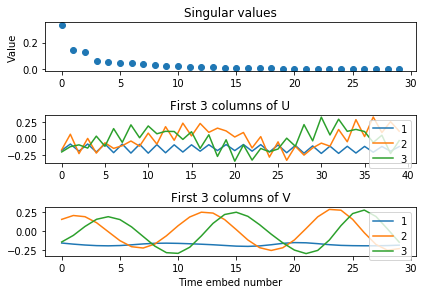

In [95]:
U,Sigma,VT = svd(H1,full_matrices=0) 
V = transpose(VT)
print(U.shape)
print(Sigma.shape)
print(V.shape)
# print(Sigma)
plt.subplot(3,1,1)
plt.plot(Sigma/ (sum(Sigma)), 'o')
plt.title('Singular values')
plt.ylabel('Value')
# plt.show()
plt.subplot(3,1,2)
plt.plot(U[:,0:3])
plt.legend(["1", "2", "3"])
plt.title('First 3 columns of U')
# plt.show()
plt.subplot(3,1,3)
print(V.shape)
plt.plot(V[:,0:3])
plt.title('First 3 columns of V')
plt.legend(["1", "2", "3"])
plt.tight_layout()
plt.xlabel('Time embed number')
plt.show()

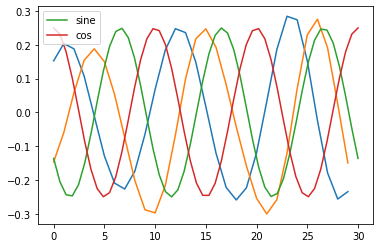

1.2566370614359172
5.711986642890532


In [76]:
plt.plot(V[:,1:3])
# plt.legend(["1", "2", "3"])
plt.plot(linspace(0,30), 0.25*sin(2*pi/10*linspace(0,30)+10), label ="sine")
plt.plot(linspace(0,30), 0.25*cos(2*pi/10*linspace(0,30)), label = "cos")
plt.legend()
plt.show()
print(2*pi/5)
print(2*pi/1.1)

In [125]:
Phi, Lambda, b = DMD(H1[:, :-1],H1[:, 1:],15)

In [78]:
x = []
for t in linspace(0,58):
    x_t = matmul(Phi, matmul(Lambda ** t, b))
    x.append(x_t)
x = array(x)
x_time_DMD = x
# print(x)

In [79]:
print(x.shape)
print(H1.shape)
print(hare.shape)

(50, 40)
(40, 30)
(59,)


In [87]:
print(pinv(Phi)*[hare[0], lynx[0]])

ValueError: operands could not be broadcast together with shapes (15,40) (2,) 

Text(0.5, 1.0, 'Predicting Hare vs Lynx populations using Time Delayed Embedding DMD')

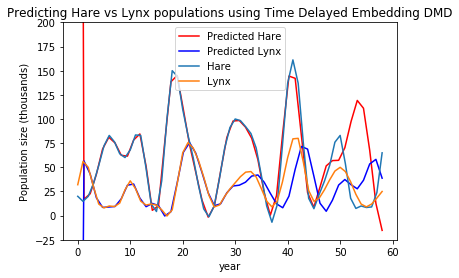

In [83]:
plt.plot(linspace(0,58), x[:,0], 'r', label="Predicted Hare")
plt.plot(linspace(0,58), x[:,1], 'b', label = "Predicted Lynx")
# plt.plot(linspace(0,5), x[:,2], 'g')
plt.plot(year, hare, label = "Hare")
plt.plot(year, lynx, label = "Lynx")
plt.ylim([-25, 200])
plt.xlabel("year")
plt.ylabel("Population size (thousands)")
plt.legend()
plt.title("Predicting Hare vs Lynx populations using Time Delayed Embedding DMD")

In [131]:
#Calculate KL divergence 

x = []
for t in linspace(30,58):
    x_t = (Phi @ ((Lambda ** t) @ b))#matmul(Phi, matmul(exp(Lambda * t), b))
    x.append(x_t)
x_DMD = array(x)
print(x_DMD.shape)

x = arange(0,600,0.1)
x_bincenters = arange(-0.001,600,0.1)

f_hare = histogram(array([hare]),bins=x_bincenters)[0]+0.1 # generate PDFs
f_lynx = histogram(array([lynx]),bins=x_bincenters)[0]+0.1 # generate PDFs
g1_hare = histogram(x_DMD[:,0],bins=x_bincenters)[0] +0.1
g1_lynx = histogram(x_DMD[:,1],bins=x_bincenters)[0] +0.1

f_hare = f_hare/trapz(f_hare,x) # normalize data
g1_hare = g1_hare/trapz(g1_hare,x)
f_lynx = f_lynx/trapz(f_lynx,x) # normalize data
g1_lynx = g1_lynx/trapz(g1_lynx,x)

# plt.figure()
# plt.plot(x,f,LineWidth=2,label='f')
# plt.plot(x,g1,LineWidth=2,label='g1')
# # plt.plot(x,g2,LineWidth=2,label='g2')
# # plt.plot(x,g3,LineWidth=2,label='g3')
# # plt.plot(x,g4,LineWidth=2,label='g4')
# plt.legend()
# plt.show()


# Compute integrand
Int1_hare = f_hare * log(divide(f_hare,g1_hare))
Int1_lynx = f_lynx * log(divide(f_lynx,g1_lynx))


# KL divergence
I1_hare = trapz(Int1_hare,x)
I1_lynx = trapz(Int1_lynx,x)
print("DMD KL divergence: ", I1_hare, " ", I1_lynx)

#AIC and BIC
mu = np.mean(x_DMD[:,:2])
sigma = np.std(x_DMD[:,:2])

#find log like
# print(x_DMD[:,:2])
log_like_sum = -len(x_DMD[:,:2])/2 * log(2*pi) - len(x_DMD[:,:2])/2*log(sigma)
for i in range(len(x_DMD[:,:2])):
    log_like_sum -= 1/(2*sigma) *(x_DMD[i, :2] - mu)**2 
    
    
print(H1.shape)
print("DMD AIC:", real(2*(40*15) -  2* log_like_sum))
print("DMD BIC:", real(log(len(x_DMD[:,:2]))*(40*15) -  2* log_like_sum))

(50, 40)
DMD KL divergence:  0.21433120827493543   0.22168414914541731
(40, 30)
DMD AIC: [4309.61543907 2207.41525289]
DMD BIC: [5456.82924233 3354.62905614]


## Lotka-Volterra

In [204]:
x1 = hare[1:-1]
x2 = lynx[1:-1]
A = array([x1, x2, (x1*x2)]).transpose()
print(A.shape)
# print(A)

(57, 3)


1.0


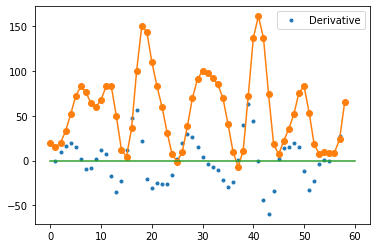

In [217]:
x1dot = zeros(len(hare)-2)
x2dot = zeros(len(lynx) -2 )
# n=length(t);
print(delta_t)
for j in range(1, len(hare)-1):#-14):
    x1dot[j-1]= (hare[j+1]-hare[j-1] )/(2*delta_t)
    x2dot[j-1]= (lynx[j+1]-lynx[j-1])/(2*delta_t)

    
# print(x1dot)
rhs = array([x1dot, x2dot]).transpose()
# print(b.shape)
plt.plot(year[1:-1], x1dot, '.', label = "Derivative")
plt.plot(year, hare, '-o')
plt.plot([0,60], [0,0])
plt.legend()

In [208]:
print(A.shape)
print(rhs.shape)

(57, 3)
(57, 2)


In [221]:
xi = linalg.lstsq(A,rhs)[0]

print(xi)
b = xi[0,0]
p = -xi[2,0]
r = xi[2, 1]
d = -xi[1,1]

[[ 0.23910373  0.08857065]
 [-0.28124171 -0.2891823 ]
 [-0.0029113   0.00176207]]


C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


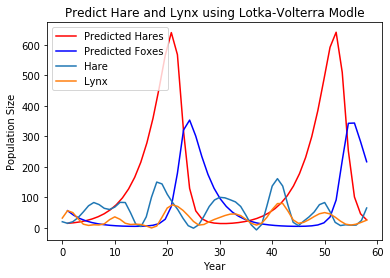

In [223]:
#!python

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ (b-p*X[1])*X[0] ,
                  (r*X[0] - d)*X[1] ])    


from scipy import integrate
step_n = 1
t = linspace(year[step_n], year[-1])              # time
X0 = array([hare[step_n], lynx[step_n]])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']  


#!python
hare_LV, lynx_LV = X.T
x_LV = array([hare_LV, lynx_LV])
f1 = plt.figure()
plt.plot(t, hare_LV, 'r-', label='Predicted Hares')
plt.plot(t, lynx_LV  , 'b-', label='Predicted Foxes')
plt.plot(year, hare, label = "Hare")
plt.plot(year, lynx, label = "Lynx")
# plt.ylim([-20,150])
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Population Size')
plt.title('Predict Hare and Lynx using Lotka-Volterra Modle')
f1.savefig('rabbits_and_foxes_1.png')

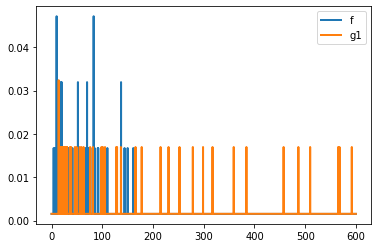

DMD KL divergence:  0.20735347819117073   0.22168414914541804
127.08894609995612
164.26078411050256
DMD AIC: [12520.30695543  4615.70469345]
DMD BIC: [12527.95504745  4623.35278548]


In [242]:
# print(hare.shape)
# hare_LV = hare_LV[30:,]
# lynx_LV = lynx_LV[30:,]
# print(hare_LV)



#Calculate KL divergence 

x = arange(0,600,0.1)
x_bincenters = arange(-0.001,600,0.1)

f_hare = histogram(array([hare]),bins=x_bincenters)[0]+0.1 # generate PDFs
f_lynx = histogram(array([lynx]),bins=x_bincenters)[0]+0.1 # generate PDFs
g1_hare = histogram(hare_LV,bins=x_bincenters)[0] +0.1
g1_lynx = histogram(lynx_LV,bins=x_bincenters)[0] +0.1

f_hare = f_hare/trapz(f_hare,x) # normalize data
g1_hare = g1_hare/trapz(g1_hare,x)
f_lynx = f_lynx/trapz(f_lynx,x) # normalize data
g1_lynx = g1_lynx/trapz(g1_lynx,x)

plt.figure()
plt.plot(x,f_hare,LineWidth=2,label='f')
plt.plot(x,g1_hare,LineWidth=2,label='g1')
# plt.plot(x,g2,LineWidth=2,label='g2')
# plt.plot(x,g3,LineWidth=2,label='g3')
# plt.plot(x,g4,LineWidth=2,label='g4')
plt.legend()
plt.show()


# Compute integrand
Int1_hare = f_hare * log(divide(f_hare,g1_hare))
Int1_lynx = f_lynx * log(divide(f_lynx,g1_lynx))


# KL divergence
I1_hare = trapz(Int1_hare,x)
I1_lynx = trapz(Int1_lynx,x)
print("DMD KL divergence: ", I1_hare, " ", I1_lynx)

#AIC and BIC
x_LV = array([hare_LV, lynx_LV])
x_LV = x_LV.transpose()
# print(x_LV.shape)
# print(x_LV)
# print("hare = ", hare_LV)
# print(mean(real(hare_LV)))
mu = np.mean(x_LV)
sigma = np.std(x_LV)
print(mu)
print(sigma)

#find log like
# print(x_DMD[:,:2])
log_like_sum = -len(x_LV)/2 * log(2*pi) - len(x_LV)/2*log(sigma)
for i in range(len(x_LV)):
    log_like_sum -= 1/(2*sigma) *(x_LV - mu)**2 
    
# print(mean(log_like_sum, axis = 0))
# print(H1.shape)
print("DMD AIC:", real(2*(4) -  2*mean(log_like_sum, axis = 0)))
print("DMD BIC:", real(log(len(x_LV))*(4) -  2* mean(log_like_sum, axis = 0)))

### Nonlinear dynamical fit with sparse regression

In [244]:
from_end = -30
# maximum = max(max(hare), max(lynx))
# hare_norm = hare / maximum
# lynx_norm = lynx/ maximum
x1 = hare[1:-1]
x2 = lynx[1:-1]


plt.show()
A_long = array([ones(x1.shape), x1, x2, (x1*x1), (x1*x2), (x2*x2), (x1**3), x1**2*x2, x1*x2**2, x2**3, \
          x1**4, x1**3*x2, x1**2*x2**2, x1*x2**3, x2**4, sin(x1), cos(x1), sin(x2), cos(x2), \
          sin(x1**2), cos(x1**2), sin(x1*x2), cos(x1*x2), sin(x2**2), cos(x2**2), \
          sin(2*x1), cos(2*x1), sin(2*x2), cos(2*x2), sin(2*pi/10*x1), cos(2*pi/10*x1), sin(2*pi/10*x2), cos(2*pi/10*x2),\
          sin(3*x1), cos(3*x1), sin(3*x2), cos(3*x2), sin(4*x1), cos(4*x1), sin(4*x2), cos(4*x2),
          sin(2*pi/12*x1), cos(2*pi/12*x1), sin(2*pi/12*x2), cos(2*pi/12*x2), sin(x1**3), cos(x1**3), sin(x1**2*x2), \
          cos(x1**2*x2), sin(x1*x2**2), cos(x1*x2**2), sin(x2**3), cos(x2**3)     ]).transpose()
names = ["1", "x1", "x2", "x1^2", "x1x2", "x2^2", "x1^3", "x1^2x2", "x1x2^2", "x2^3", "x1^4", "x1^3x2", "x1^2x2^2", \
        "x1x2^3", "x2^4", "sin x1", 'cos(x1)', "sin(x2)", "cos(x2)", \
          "sin(x1**2)", "cos(x1**2)", "sin(x1*x2)", "cos(x1*x2)", "sin(x2**2)", "cos(x2**2)", \
          "sin(2*x1)", 'cos(2*x1)', 'sin(2*x2)', 'cos(2*x2)', 'sin(2*pi/10*x1)', 'cos(2*pi/10*x1)', 'sin(2*pi/10*x2)', 'cos(2*pi/10*x2)',\
          'sin(3*x1)', 'cos(3*x1)', 'sin(3*x2)', 'cos(3*x2)', 'sin(4*x1)', 'cos(4*x1)', 'sin(4*x2)', 'cos(4*x2)',
          'sin(2*pi/12*x1)', 'cos(2*pi/12*x1)', 'sin(2*pi/12*x2)', 'cos(2*pi/12*x2)', 'sin(x1**3)', 'cos(x1**3)', 'sin(x1**2*x2)', \
          'cos(x1**2*x2)', 'sin(x1*x2**2)', 'cos(x1*x2**2)', 'sin(x2**3)', 'cos(x2**3)'    ]
A = A_long[0:from_end+1,:]
# print(A.shape)
# print(len(names))
# print(A)
print(A_long.shape)
print(A.shape)
# print(A)
x1dot = zeros(len(hare)+from_end-1)
x2dot = zeros(len(lynx)+ from_end-1)
# n=length(t);
print(delta_t)
for j in range(1, len(hare)+from_end):
    x1dot[j-1]= (hare[j+1]-hare[j-1] )/(2*delta_t)
    x2dot[j-1]= (lynx[j+1]-lynx[j-1])/(2*delta_t)

rhs = array([x1dot, x2dot]).transpose()
print(rhs)
print('rhs shape = ', rhs.shape)
print('A shape = ',A.shape)

xi = linalg.lstsq(A,rhs)[0]
x_lstsq = A_long @ xi
print("A_long shape = ", A_long.shape)
print(xi.shape)

(57, 53)
(28, 53)
1.0
[[ 0.00000000e+00  9.00000000e+00]
 [ 9.19839116e+00 -1.31591086e+01]
 [ 1.60000000e+01 -1.90000000e+01]
 [ 1.95407177e+01 -1.09317827e+01]
 [ 1.55000000e+01 -1.00000000e+00]
 [ 2.01373814e+00  6.98739480e-01]
 [-9.50000000e+00  1.50000000e+00]
 [-8.09567023e+00  8.63682479e+00]
 [ 2.00000000e+00  1.15000000e+01]
 [ 1.16814428e+01  6.91461362e-01]
 [ 7.50000000e+00 -1.05000000e+01]
 [-1.69426008e+01 -8.52767024e+00]
 [-3.55000000e+01 -1.50000000e+00]
 [-2.26610394e+01 -1.82804136e-02]
 [ 1.20000000e+01 -3.00000000e+00]
 [ 4.80867585e+01 -5.64920811e+00]
 [ 5.70000000e+01  0.00000000e+00]
 [ 2.17515056e+01  1.74901128e+01]
 [-2.00000000e+01  2.95000000e+01]
 [-3.03427807e+01  2.04387567e+01]
 [-2.50000000e+01  2.50000000e+00]
 [-2.59428826e+01 -9.12013972e+00]
 [-2.65000000e+01 -1.50000000e+01]
 [-1.62606887e+01 -1.81456979e+01]
 [ 1.50000000e+00 -1.55000000e+01]
 [ 1.97356375e+01 -4.98456886e+00]
 [ 3.00000000e+01  5.50000000e+00]
 [ 2.64431386e+01  8.33397330e+00

C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


66
9.21661407159786


Text(0.5, 1.0, 'Weights of different terms for Least Squares')

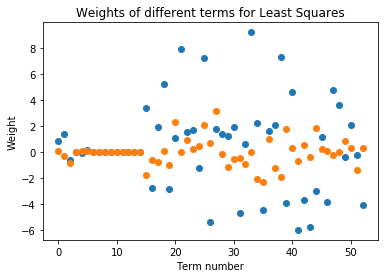

In [245]:
print(xi.argmax())
# print(xi)
print(xi.max())
plt.plot(xi, 'o')  
plt.xlabel('Term number')
plt.ylabel('Weight')
plt.title('Weights of different terms for Least Squares')

(57, 2)
(58, 2)


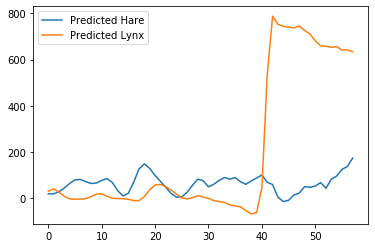

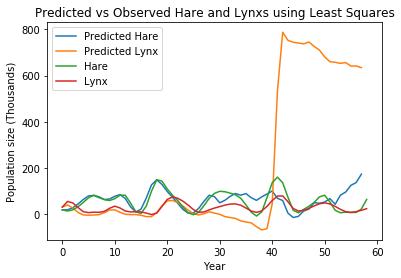

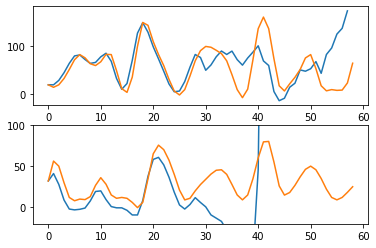

In [246]:
#predict
b = A_long @ xi
print(b.shape)
# from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
print(array(answer).shape)
plt.plot(year[0:len(answer)], answer);
plt.legend(["Predicted Hare", "Predicted Lynx"])
plt.show()
plt.plot(year[0:len(answer)], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.title('Predicted vs Observed Hare and Lynxs using Least Squares')
plt.xlabel('Year')
plt.ylabel('Population size (Thousands)')
# plt.ylim([0,1])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:len(answer)], array(answer)[:,0])
# plt.ylim([0,1])
# fig.plot(year[from_end], array(answer)[from_end, 0], 'mo')
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:len(answer)], array(answer)[:,1])
plt.ylim([-20,100])
plt.plot(year, lynx)
plt.show()

(58, 2)
[ 14.80160884  16.59260238  19.41304974  23.43021296  28.92387384
  36.29370501  46.08156046  59.00606805  76.00929188  98.31562078
 127.50118016 165.56527288 214.97492988 278.5911635  359.18061168
 457.48357466 565.06692821 640.01251368 567.6702381  317.38345945
 129.15622002  55.71429978  29.78659018  19.75215497  15.61563965
  14.12186954  14.11627616  15.18983593  17.24977908  20.37300951
  24.75762085  30.71441994  38.6788459   49.23670552  63.16200946
  81.46695658 105.46399652 136.83711847 177.71032297 230.67371301
 298.64216175 384.13457866 486.51460989 591.86704195 641.16941678
 509.72981733 252.27672379 101.1400814   45.96961839  26.12745323]


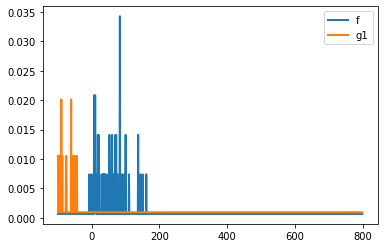

DMD KL divergence:  0.8119811120310744   0.8286148549662711
-26.381835953243165
70.6565802106776
DMD AIC: [2366.90893255 2155.21922457]
DMD BIC: [2441.51238512 2229.82267714]


In [241]:
print(array(answer).shape)
hare_lstsq = array(answer)[30:,0]
lynx_lstsq= array(answer)[30:,1]
print(hare_LV)



#Calculate KL divergence 

x = arange(-100,800,1)
x_bincenters = arange(-100.001,800,1)

f_hare = histogram(array([hare]),bins=x_bincenters)[0]+0.1 # generate PDFs
f_lynx = histogram(array([lynx]),bins=x_bincenters)[0]+0.1 # generate PDFs
g1_hare = histogram(hare_lstsq,bins=x_bincenters)[0] +0.1
g1_lynx = histogram(lynx_lstsq,bins=x_bincenters)[0] +0.1

f_hare = f_hare/trapz(f_hare,x) # normalize data
g1_hare = g1_hare/trapz(g1_hare,x)
f_lynx = f_lynx/trapz(f_lynx,x) # normalize data
g1_lynx = g1_lynx/trapz(g1_lynx,x)

plt.figure()
plt.plot(x,f_hare,LineWidth=2,label='f')
plt.plot(x,g1_hare,LineWidth=2,label='g1')
# plt.plot(x,g2,LineWidth=2,label='g2')
# plt.plot(x,g3,LineWidth=2,label='g3')
# plt.plot(x,g4,LineWidth=2,label='g4')
plt.legend()
plt.show()


# Compute integrand
Int1_hare = f_hare * log(divide(f_hare,g1_hare))
Int1_lynx = f_lynx * log(divide(f_lynx,g1_lynx))


# KL divergence
I1_hare = trapz(Int1_hare,x)
I1_lynx = trapz(Int1_lynx,x)
print("DMD KL divergence: ", I1_hare, " ", I1_lynx)

#AIC and BIC
x_LV = array([hare_lstsq, lynx_lstsq])
x_LV = x_LV.transpose()
# print(x_LV.shape)
# print(x_LV)
# print("hare = ", hare_LV)
# print(mean(real(hare_LV)))
mu = np.mean(x_LV)
sigma = np.std(x_LV)
print(mu)
print(sigma)

#find log like
# print(x_DMD[:,:2])
log_like_sum = -len(x_LV)/2 * log(2*pi) - len(x_LV)/2*log(sigma)
for i in range(len(x_LV)):
    log_like_sum -= 1/(2*sigma) *(x_LV - mu)**2 
    
# print(mean(log_like_sum, axis = 0))
# print(H1.shape)
print("DMD AIC:", real(2*(A.size) -  2*mean(log_like_sum, axis = 0)))
print("DMD BIC:", real(log(len(x_LV))*(A.size) -  2* mean(log_like_sum, axis = 0)))

2
answer shape =  (58, 2)
year end size =  (29,)
all year =  (59,)


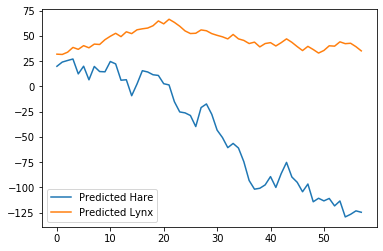

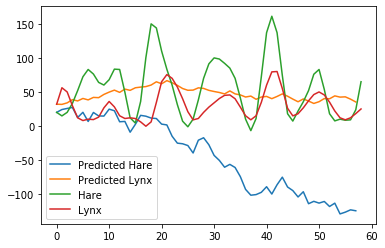

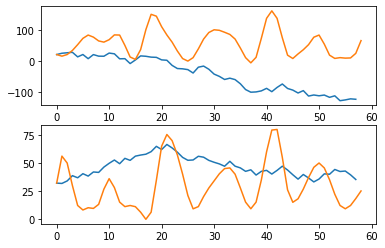

In [238]:
num_nonzero = 2
[times, terms] = A.shape
print(terms)
ep = 0.1
previous = 90
# for i in range(1):
while terms > num_nonzero:
    index_to_delete = []
    
    for i in range(len(xi)):
            if((abs(xi[i,0])< ep) and (abs(xi[i,1])< ep)):
                index_to_delete.append(i)
#     print(index_to_delete)

#     print("before = ", A_long.shape)
    A_long= delete(A_long, index_to_delete, 1)   
    names= delete(names, index_to_delete)
#     print("names size = ", names.shape)
#     print("after = ", A_long.shape)

    A = A_long[:from_end+1,:]
#     print(A.shape)
#     print(rhs.shape)
    xi = linalg.lstsq(A,rhs)[0]
#     plt.plot(xi, 'o') 
#     plt.show()

    [times, terms] = A.shape
    if(previous == terms):
        ep += 1
        print(ep)
    else:
        ep = max(abs(xi[:,0]).min(), abs(xi[:,1]).min())+0.1
        previous = terms
#     print("average = ", ep)
    print("terms = ", terms)
    
    
b = A_long @ xi
# from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
print("answer shape = ", array(answer).shape)
print("year end size = ", year[0:from_end].shape)
print("all year = ", year.shape)
plt.plot(year[0:len(answer)], answer);
plt.legend(["Predicted Hare", "Predicted Lynx"])
plt.show()
plt.plot(year[0:len(answer)], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
# plt.ylim([0,1])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:len(answer)], array(answer)[:,0])
# plt.ylim([-25, 200])
# fig.plot(year[from_end], array(answer)[from_end, 0], 'mo')
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:len(answer)], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()

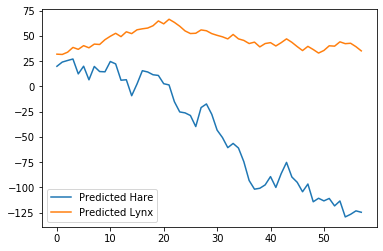

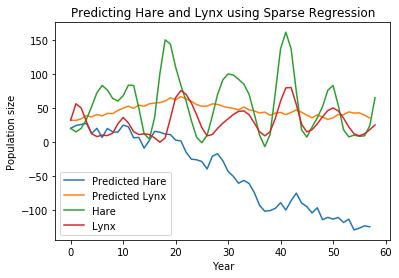

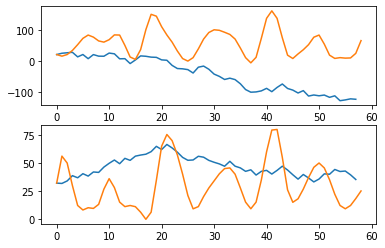

In [243]:
plt.plot(year[0:len(answer)], answer);
plt.legend(["Predicted Hare", "Predicted Lynx"])
plt.show()
plt.plot(year[0:len(answer)], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.title('Predicting Hare and Lynx using Sparse Regression')
plt.xlabel('Year')
plt.ylabel('Population size')
# plt.ylim([0,1])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:len(answer)], array(answer)[:,0])
# plt.ylim([-25, 200])
# fig.plot(year[from_end], array(answer)[from_end, 0], 'mo')
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:len(answer)], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()

(58, 2)
[ 14.80160884  16.59260238  19.41304974  23.43021296  28.92387384
  36.29370501  46.08156046  59.00606805  76.00929188  98.31562078
 127.50118016 165.56527288 214.97492988 278.5911635  359.18061168
 457.48357466 565.06692821 640.01251368 567.6702381  317.38345945
 129.15622002  55.71429978  29.78659018  19.75215497  15.61563965
  14.12186954  14.11627616  15.18983593  17.24977908  20.37300951
  24.75762085  30.71441994  38.6788459   49.23670552  63.16200946
  81.46695658 105.46399652 136.83711847 177.71032297 230.67371301
 298.64216175 384.13457866 486.51460989 591.86704195 641.16941678
 509.72981733 252.27672379 101.1400814   45.96961839  26.12745323]


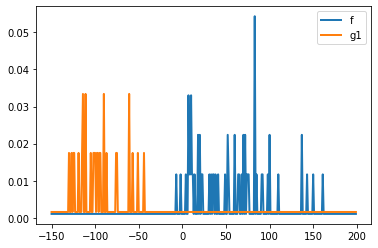

DMD KL divergence:  1.4191594668454472   1.2834445291547136
-26.381835953243165
70.6565802106776
DMD AIC: [2366.90893255 2155.21922457]
DMD BIC: [2441.51238512 2229.82267714]


In [240]:
print(array(answer).shape)
hare_sparse = array(answer)[30:,0]
lynx_sparse = array(answer)[30:,1]
print(hare_LV)



#Calculate KL divergence 

x = arange(-150,200,1)
x_bincenters = arange(-150.001,200,1)

f_hare = histogram(array([hare]),bins=x_bincenters)[0]+0.1 # generate PDFs
f_lynx = histogram(array([lynx]),bins=x_bincenters)[0]+0.1 # generate PDFs
g1_hare = histogram(hare_sparse,bins=x_bincenters)[0] +0.1
g1_lynx = histogram(lynx_sparse,bins=x_bincenters)[0] +0.1

f_hare = f_hare/trapz(f_hare,x) # normalize data
g1_hare = g1_hare/trapz(g1_hare,x)
f_lynx = f_lynx/trapz(f_lynx,x) # normalize data
g1_lynx = g1_lynx/trapz(g1_lynx,x)

plt.figure()
plt.plot(x,f_hare,LineWidth=2,label='f')
plt.plot(x,g1_hare,LineWidth=2,label='g1')
# plt.plot(x,g2,LineWidth=2,label='g2')
# plt.plot(x,g3,LineWidth=2,label='g3')
# plt.plot(x,g4,LineWidth=2,label='g4')
plt.legend()
plt.show()


# Compute integrand
Int1_hare = f_hare * log(divide(f_hare,g1_hare))
Int1_lynx = f_lynx * log(divide(f_lynx,g1_lynx))


# KL divergence
I1_hare = trapz(Int1_hare,x)
I1_lynx = trapz(Int1_lynx,x)
print("DMD KL divergence: ", I1_hare, " ", I1_lynx)

#AIC and BIC
x_LV = array([hare_sparse, lynx_sparse])
x_LV = x_LV.transpose()
# print(x_LV.shape)
# print(x_LV)
# print("hare = ", hare_LV)
# print(mean(real(hare_LV)))
mu = np.mean(x_LV)
sigma = np.std(x_LV)
print(mu)
print(sigma)

#find log like
# print(x_DMD[:,:2])
log_like_sum = -len(x_LV)/2 * log(2*pi) - len(x_LV)/2*log(sigma)
for i in range(len(x_LV)):
    log_like_sum -= 1/(2*sigma) *(x_LV - mu)**2 
    
# print(mean(log_like_sum, axis = 0))
# print(H1.shape)
print("DMD AIC:", real(2*(A.size) -  2*mean(log_like_sum, axis = 0)))
print("DMD BIC:", real(log(len(x_LV))*(A.size) -  2* mean(log_like_sum, axis = 0)))

In [233]:
print(names)

['sin(3*x1)' 'cos(4*x2)']


In [ ]:
# print(xi)
plt.semilogy(abs(xi))
print(min(abs(xi[0])))
min(abs(xi[1]))

In [ ]:
# print(xi)
xi_less = zeros(xi.shape)
ep = 0.01
for i in range(len(xi)):
    for j in range(len(xi[0])):
        if(abs(xi[i,j])> ep):
            xi_less[i,j] = xi[i,j]
            
print(xi_less)
plt.plot(xi_less, 'o')
plt.show()
b = A_long @ xi_less;
from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
# print(array(answer).shape)
plt.plot(year[0:from_end], answer);
plt.legend(["Predicted Hare", "Predicted Lynx"])
plt.show()
plt.plot(year[0:from_end], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.ylim([-25, 100])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,0])
plt.ylim([-25, 200])
fig.plot(year[-14], array(answer)[-14, 0], 'mo')
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(A, rhs)
print(A.shape)
x = clf.coef_
x = transpose(x)
# print(x)
plt.plot(x, 'o')  
plt.show()


In [ ]:
#predict
b = A_long @ x;
# print(b)
# x_0 = [hare[0], lynx[0]]
# answer = []
# for i in range(len(b)):
#     answer.append(x_0 + b[i]*delta_t)
# print(b)
from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
print(array(answer)[:,0])
plt.plot(year[0:from_end], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,0])
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()

### Finding KL Divergence

In [ ]:
x = arange(0,600,0.1)
x_bincenters = arange(-0.001,600,0.1)

f = histogram(array([hare, lynx]),bins=x_bincenters)[0] +0.1 # generate PDFs
g1 = histogram(x_DMD,bins=x_bincenters)[0] +0.1
g2 = histogram(x_time_DMD,bins=x_bincenters)[0] +0.1
g3 = histogram(x_LV,bins=x_bincenters)[0] +0.1
g4 = histogram(x_lstsq,bins=x_bincenters)[0] +0.1

print(x.shape)
print(f.shape)
# g2a = np.histogram(x3,bins=x_bincenters)[0]
# g2b = np.histogram(x4,bins=x_bincenters)[0]
# g2 = g2a + 0.3*g2b + 0.01
# g3 = np.histogram(x5,bins=x_bincenters)[0] + 0.01

plt.figure()
plt.plot(x,f,LineWidth=2,label='f')
plt.plot(x,g1,LineWidth=2,label='g1')
plt.plot(x,g2,LineWidth=2,label='g2')
plt.plot(x,g3,LineWidth=2,label='g3')
plt.plot(x,g4,LineWidth=2,label='g4')
plt.legend()
plt.show()

f = f/trapz(f,x) # normalize data
g1 = g1/trapz(g1,x)
g2 = g2/trapz(g2,x)
g3 = g3/trapz(g3,x)
g4 = g4/trapz(g4,x)

plt.figure()
plt.plot(x,f,LineWidth=2,label='f')
plt.plot(x,g1,LineWidth=2,label='g1')
plt.plot(x,g2,LineWidth=2,label='g2')
plt.plot(x,g3,LineWidth=2,label='g3')
plt.plot(x,g4,LineWidth=2,label='g4')
plt.legend()
plt.show()

In [ ]:

# Compute integrand
Int1 = f * log(divide(f,g1))
Int2 = f*log(divide(f,g2))
Int3 = f*log(divide(f,g3))
Int4 = f*log(divide(f,g4))

# KL divergence
I1 = trapz(Int1,x)
I2 = trapz(Int2, x)
I3 = trapz(Int3, x)
I4 = trapz(Int4, x)
print("DMD: ", I1)
print("Time Delayed DMD: ", I2)
print("Lotka-Volterra: ", I3)
print("Least Squares: ", I4)

In [ ]:
def kl_divergence(f, g):
    summation = 0
    for i in range(min(len(f), len(g))):
        summation += sum(f[i] * real(log(f[i]/g[i])))
    return summation

print(kl_divergence(array([hare, lynx]).T, x_DMD))
print(kl_divergence(array([hare, lynx]).T, x_time_DMD))